In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv("data/weather_14_days.csv")
data.head()

,day,description,temp_high_c,temp_low_c,humidity_estimate
0,2025-11-30,Cloudy; breezy with periods of rain,9,1,85
1,2025-12-01,Partly sunny,6,-3,70
2,2025-12-02,"Rain and snow, little accumulation",3,-2,80
3,2025-12-03,Mostly sunny,3,-1,60
4,2025-12-04,"Mostly cloudy, snow shower in afternoon",5,-12,75


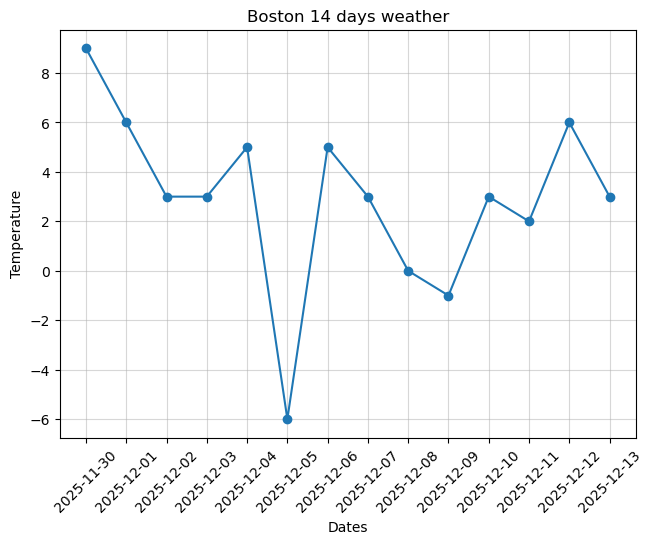

In [38]:
fig = plt.figure()
axes = fig.add_axes([0.05, 0.1, 0.9, 0.85])
axes.plot(data.day, data.temp_high_c, marker="o")

axes.set_title("Boston 14 days weather")
axes.set_xlabel("Dates")
axes.set_ylabel("Temperature")
axes.grid(True, alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout
plt.show()

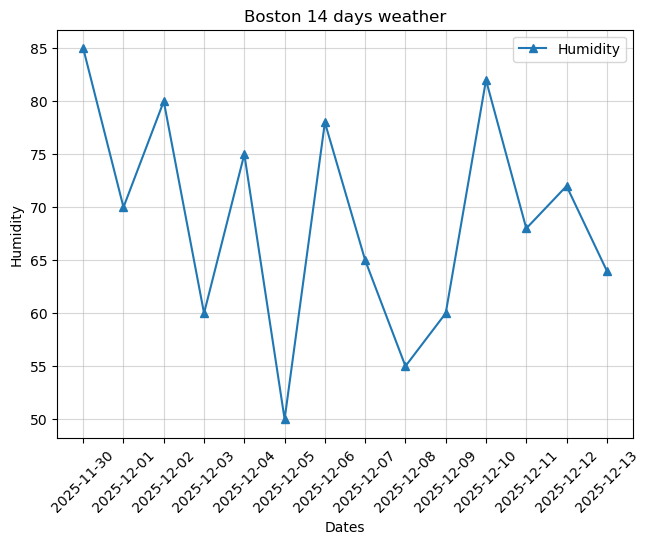

In [46]:
fig = plt.figure()
axes = fig.add_axes([0.05, 0.1, 0.9, 0.85])
axes.plot(data.day, data.humidity_estimate, marker="^", label="Humidity", color="tab:blue")

axes.set_title("Boston 14 days weather")
axes.set_xlabel("Dates")
axes.set_ylabel("Humidity")
axes.grid(True, alpha=0.5)

plt.xticks(rotation=45)
# plt.tight_layout()
plt.legend()
plt.show()

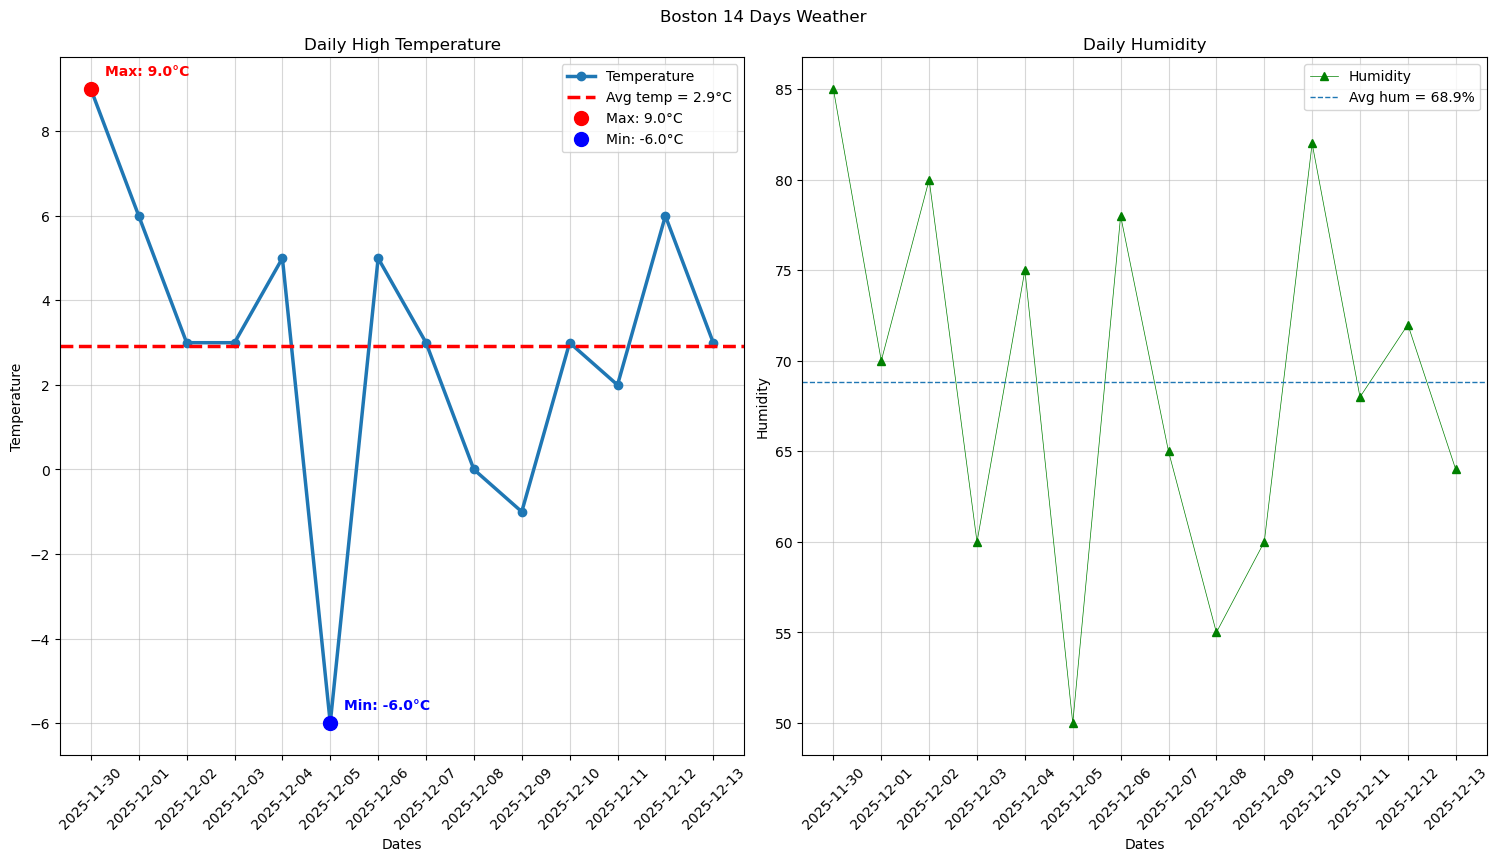

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Average temp and humidity
avg_temp = sum(data.temp_high_c) / len(data.temp_high_c)
avg_hum = sum(data.humidity_estimate) / len(data.humidity_estimate)

# Use suptitle for the overall figure title instead of fig.set_title()
fig.suptitle("Boston 14 Days Weather")

min_temp = data.temp_high_c.min()
min_day = data[data.temp_high_c == min_temp].day.iloc[0]
max_temp = data.temp_high_c.max()
max_day = data[data.temp_high_c == max_temp].day.iloc[0]

axes[0].plot(data.day, data.temp_high_c, label="Temperature", marker="o", linewidth=2.5)
axes[0].set_xlabel("Dates")
axes[0].set_ylabel("Temperature")
axes[0].grid(True, alpha=0.5)
axes[0].axhline(avg_temp, linestyle="--", linewidth=2.5, color="r", label= f"Avg temp = {avg_temp:.1f}°C")
axes[0].plot(max_day, max_temp, 'ro', markersize=10, label=f"Max: {max_temp:.1f}°C")
axes[0].annotate(f"Max: {max_temp:.1f}°C", 
                 xy=(max_day, max_temp), 
                 xytext=(10, 10),
                 textcoords='offset points',
                 color='red',
                 fontweight='bold')

axes[0].plot(min_day, min_temp, 'bo', markersize=10, label=f"Min: {min_temp:.1f}°C")
axes[0].annotate(f"Min: {min_temp:.1f}°C",
                 xy=(min_day, min_temp),
                 xytext=(10, 10),
                 textcoords='offset points',
                 color='blue',
                 fontweight='bold')

axes[1].plot(data.day, data.humidity_estimate, label="Humidity", marker="^", color="g", linewidth=0.5)
axes[1].set_xlabel("Dates")
axes[1].set_ylabel("Humidity")
axes[1].grid(True, alpha=0.5)
axes[1].axhline(avg_hum, linestyle="--", linewidth=1, label= f"Avg hum = {avg_hum:.1f}%")

# Apply rotation to both subplots' x-ticks
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Apply titles to both subplots
axes[0].set_title("Daily High Temperature")
axes[1].set_title("Daily Humidity")

# Apply legends to both subplots
axes[0].legend()
axes[1].legend()

plt.show()

fig.savefig("boston_temp_humidity_14days.png", dpi=200, bbox_inches="tight")

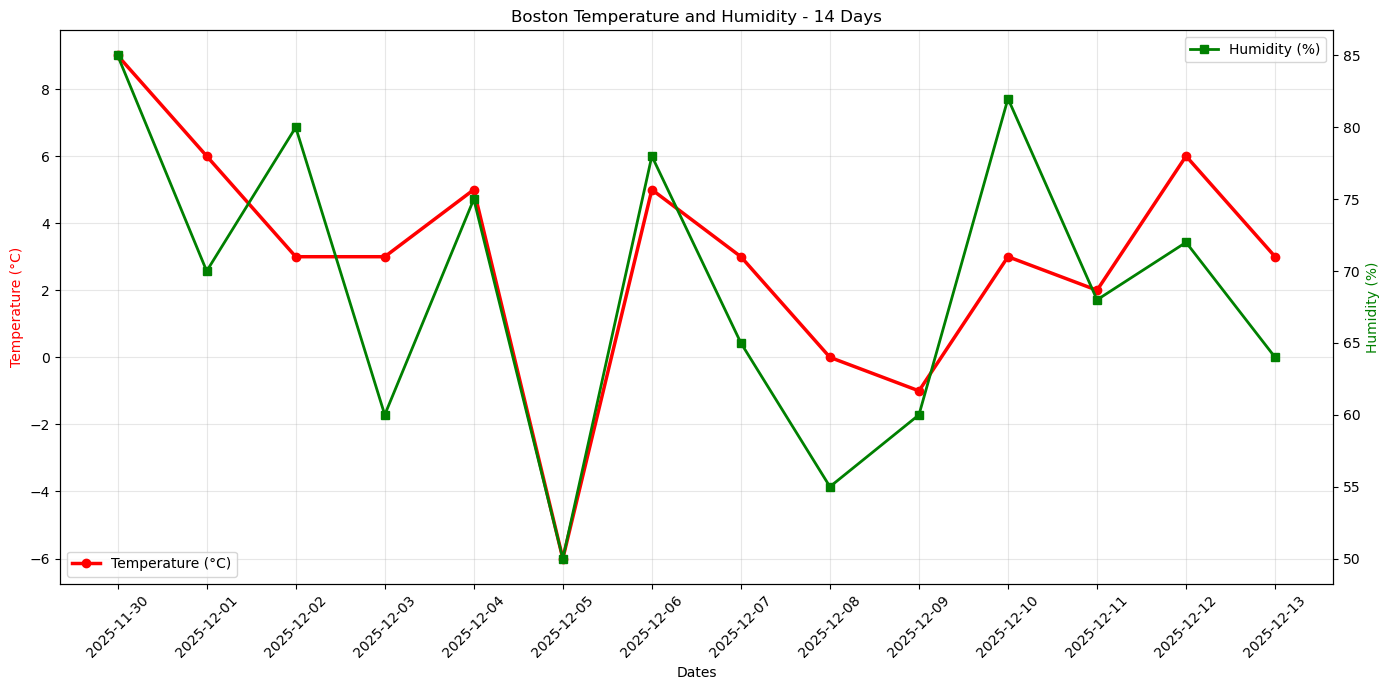

In [183]:
fig, ax = plt.subplots(figsize=(14,7))

# Plot Temperature (left y-axis)
ax.plot(data.day, data.temp_high_c, color="red", marker="o", linewidth=2.5, label="Temperature (°C)")
ax.set_ylabel("Temperature (°C)", color="red")
ax.set_xlabel("Dates")
ax.grid(True, alpha=0.3)

# Create twin axis for humidity
ax2 = ax.twinx()

# Plot Humidity (right y-axis)
ax2.plot(data.day, data.humidity_estimate, color="green", marker="s", linewidth=2, label="Humidity (%)")
ax2.set_ylabel("Humidity (%)", color="green")

# Title
ax.set_title("Boston Temperature and Humidity - 14 Days")

# Rotate x labels
ax.tick_params(axis="x", rotation=45)

# Legends (combined)
ax.legend(loc=3)
ax2.legend(loc=1)

plt.tight_layout()
plt.show()
